In [91]:
import requests
import json
import os
import re
import sys
import hashlib
import numpy as np
from datetime import datetime
from itertools import combinations
from collections import Counter

import django
from PIL import Image
from PIL.Image import Image as ImageType
from io import BytesIO
from bs4 import BeautifulSoup
from skimage import data, img_as_float
x
import matplotlib.pyplot as plt

from flat_crawler.models import FlatPost, Flat, Source
from flat_crawler.constants import SELECTED_DISTRICTS
from flat_crawler.utils.img_utils import bytes_to_images
from flat_crawler.utils.img_utils import get_img_bytes_from_url


GUMTREE_URL = "https://www.gumtree.pl/s-mieszkania-i-domy-sprzedam-i-kupie/srodmiescie/v1c9073l3200017p1?pr=450000,1000000"

NameError: name 'x' is not defined

In [29]:
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [ ]:
flat_ids = FlatPost.objects.filter(district__in=SELECTED_DISTRICTS, flat__isnull=False).values_list('flat__id').distinct()

In [ ]:
Flat.objects.filter(id__in=flat_ids).filter(min_price__gt=500000).count()

In [ ]:
flat_ids = Fla.objects.filter(published=True).values_list('make_id', flat=True)


In [ ]:
fq.all()[0]

### Image comparison

In [5]:
img_url_x = 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InY3eDRpb2txOTh5djEtQVBMIiwidyI6W3siZm4iOiJqMWozbzEzbTZiZ24xLUFQTCIsInMiOiIxNCIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.eVJ1XzpPLIOIq8rr_WyNvAmGWFp7tuXslKJPirxlhq8/image;s=1280x1024;q=80'
img_url_a = 'https://i.ebayimg.com/00/s/NjgzWDEwMjQ=/z/3H8AAOSwFu1gDFCC/$_20.JPG'
img_url_b = 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6ImZ6NjVxeThpeWc0MjEtQVBMIiwidyI6W3siZm4iOiJqMWozbzEzbTZiZ24xLUFQTCIsInMiOiIxNCIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.qD3I6cCpP0jAL3Aq96dpMZM_CAsuYmgSBwm6U9Az4pE/image;s=1280x1024;q=80'

In [33]:
im_a = Image.open(BytesIO(requests.get(img_url_a).content))
im_b = Image.open(BytesIO(requests.get(img_url_b).content))
im_x = Image.open(BytesIO(requests.get(img_url_x).content))

In [11]:
S = (150, 100)

In [19]:
adata = np.array(im_a.resize(S).convert('LA').getdata())
bdata = np.array(im_b.resize(S).convert('LA').getdata())
xdata = np.array(im_x.resize(S).convert('LA').getdata())

In [50]:
ta = img_as_float(im_a.resize(S))
tb = img_as_float(im_b.resize(S))
tx = img_as_float(im_x.resize(S)) 

In [52]:
structural_similarity(ta, tb, multichannel=True)

0.9680132260923093

In [30]:
fp = FlatPost.objects.order_by('-created').first()

In [31]:
imgs3 = bytes_to_images(FlatPost.objects.filter(photos_bytes__isnull=False).order_by('-created')[3].photos_bytes)

In [32]:
imgs = bytes_to_images(fp.photos_bytes)

In [ ]:
img_floats

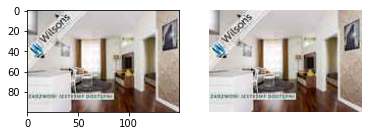

In [84]:
f, axarr = plt.subplots(1,2)
plt.axis('off')
axarr[0].imshow(imgs[0])
axarr[1].imshow(imgs[1])


In [229]:
def display_img_comp(img1, img2, sim, **other_sims):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    for img, ax in zip([img1, img2], axes.ravel()):
        ax.imshow(img)
        ax.axis('off')
    ax.text(200, 50, f"Similarity: {sim:.2}", fontsize=15)
    for i, (name, s) in enumerate(other_sims.items()):
        ax.text(200, 50 + (i + 1) * 25, f"{name}: {s:.2}", fontsize=15)
    fig.tight_layout()
    

In [282]:
def img_hist_1(im):
    ar = np.array(im.getdata())
    colors = ar[..., 0] + ar[..., 1] * 255 + ar[..., 2] * 255 ** 2
    hist = np.histogram(colors, bins=100, density=True, range=(0, 255 ** 3))[0]
    return hist / sum(hist)
    

In [295]:
def img_hist(im):
    ar = np.array(im.getdata())
    ar = (ar / 25.5001).astype(int)
    colors = ar[..., 0] + ar[..., 1] * 10 + ar[..., 2] * 100
    hist = np.histogram(colors, bins=1000, density=True, range=(0, 1000))[0]
    return hist / sum(hist)
    

In [12]:
im = im_a.resize(S)

In [13]:
ar = np.array(im.getdata())

In [14]:
aaa = (ar / 127.50001).astype(int)

In [20]:
cols = aaa[..., 0] + aaa[..., 1] * 2 + aaa[..., 2] * 4

In [26]:
h = np.histogram(cols, bins=8, range=(0, 8))[0]

In [35]:
def compare_hists(im1, im2):
    h1 = img_hist(im1)
    h2 = img_hist(im2)
    return np.sum((h1 - np.mean(h1)) * (h2 - np.mean(h2))) / ((len(h1) - 1) * np.std(h1) * np.std(h2))

In [298]:
compare_hists(imgs[0], imgs[1])

0.9758091627418216

In [277]:
h1 = img_hist(imma1)
h2 = img_hist(imma2)

In [71]:
from types import SimpleNamespace

In [80]:
class A(SimpleNamespace):
    x: int = None
    y: int = None

In [278]:
np.sum((h1 - np.mean(h1)) * (h2 - np.mean(h2))) / ((len(h1) - 1) * np.std(h1) * np.std(h2))

-0.099249849721191

In [184]:
im1 = im_a.resize(S)
im2 = im_b.resize(S)

In [196]:
a1 = np.array(im1.getdata())
a2 = np.array(im2.getdata())

In [217]:
np.std(a1, axis=0)

array([44.19126211, 49.16429937, 53.06808568])

In [ ]:
sum( (a1 - mean(a1)) * (a2 - mean(i2)) ) / (
  (i1.size - 1) * stdev(i1) * stdev(i2) )

In [41]:
q = FlatPost.objects.filter(heading='a')

In [44]:
q.first()

In [222]:
def rmse(im1, im2):
    a1 = np.array(im1.getdata())
    a2 = np.array(im2.getdata())
    denom = ((a1.size - 1) * np.std(a1, axis=0) * np.std(a2, axis=0))
    return min(np.sum((a1 - np.mean(a1, axis=0)) * (a2 - np.mean(a2, axis=0)), axis=0) / denom) * 3

In [86]:
TEST_IMAGES = imgs[:3] + imgs3[:3] + [im_a.resize(S), im_b.resize(S), im_a.resize(S)]

In [87]:
img = TEST_IMAGES[0]

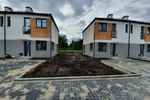

In [107]:
TEST_IMAGES[3]

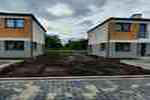

In [111]:
TEST_IMAGES[4]

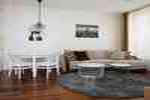

In [96]:
TEST_IMAGES[2]

In [113]:
TEST_IMAGES[3].save('static/test_data/images/img_2_a.jpg')

In [114]:
TEST_IMAGES[4].save('static/test_data/images/img_2_b.jpg')

In [101]:
im_a.resize(S).save('static/test_data/images/img_0_a.jpg') # version a of image

In [102]:
im_b.resize(S).save('static/test_data/images/img_0_b.jpg') # version b, different logo

In [104]:
TEST_IMAGES[0].save('static/test_data/images/img_1_a.jpg')

In [105]:
TEST_IMAGES[1].save('static/test_data/images/img_1_b.jpg') # cropped version of previous image

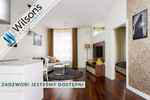

In [93]:
Image.open('static/test_data/images/img_a.jpg')

In [63]:
a = np.array(im.getdata())

In [64]:
a.size

45000

In [67]:
np.std(a, axis=0)

array([44.19126211, 49.16429937, 53.06808568])

/Users/jakubtlalka/.virtualenvs/m3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


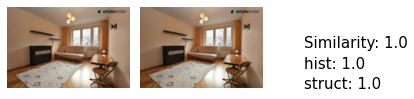

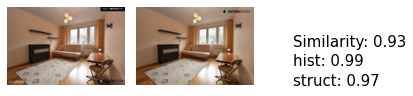

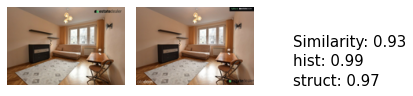

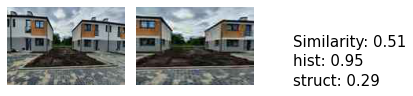

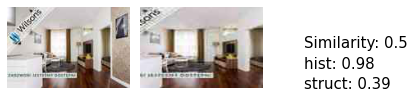

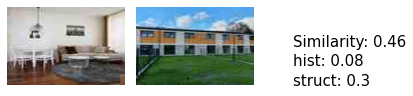

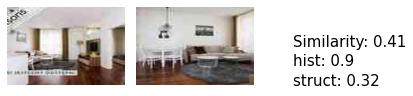

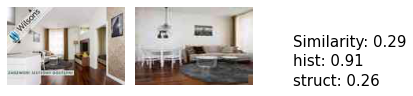

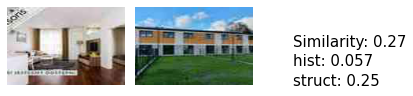

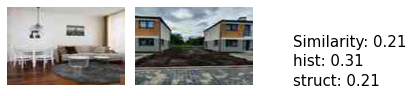

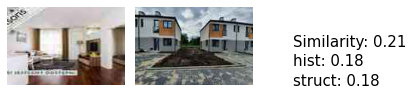

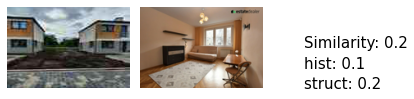

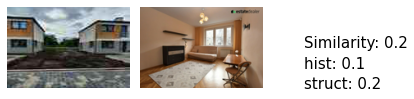

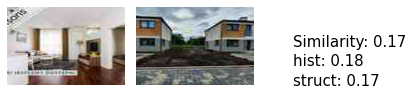

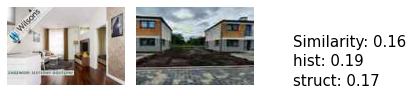

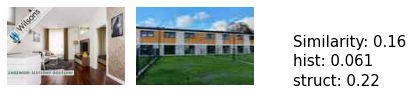

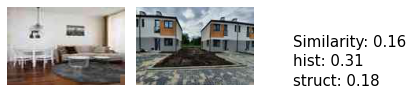

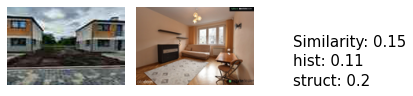

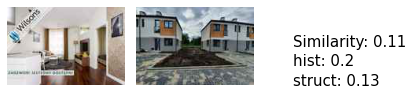

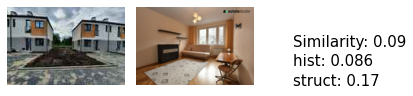

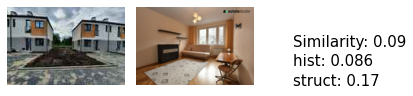

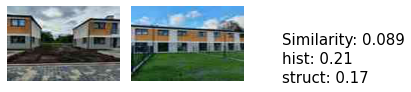

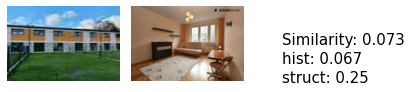

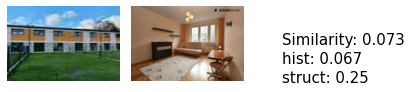

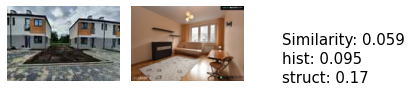

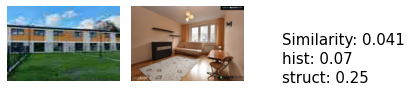

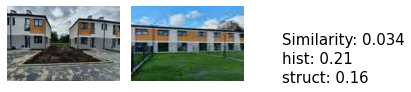

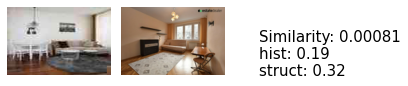

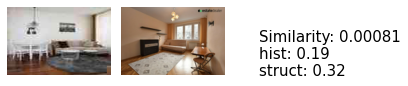

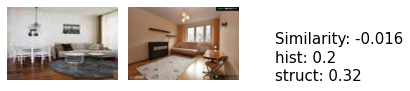

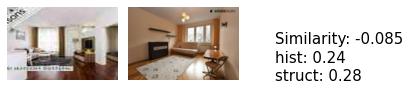

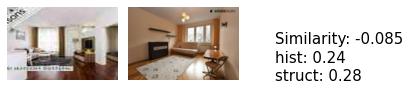

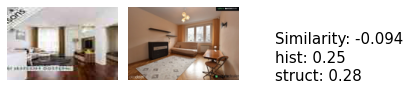

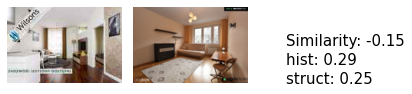

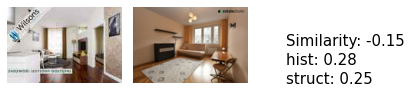

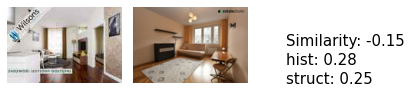

In [299]:
sim_method = lambda im1, im2: structural_similarity(img_as_float(im1), img_as_float(im2), multichannel=True)
sim_imgs = [(rmse(img1, img2), img1, img2) for img1, img2 in combinations(TEST_IMAGES, 2)]

for sim, img1, img2 in sorted(sim_imgs, reverse=True, key=lambda x: x[0]):
    display_img_comp(img1, img2, sim, hist=compare_hists(img1, img2), struct=sim_method(img1, img2))

### Converting to bytes

In [ ]:
img_bytes_a = BytesIO()
im_a.resize((150, 100), Image.ANTIALIAS).save(img_bytes_a, format="JPEG", optimize=True, quality=40)
sys.getsizeof(img_bytes_a.getvalue())

In [ ]:
img_bytes_b = BytesIO()
im_x.resize((150, 100), Image.ANTIALIAS).save(img_bytes_b, format="JPEG", optimize=True, quality=40)
sys.getsizeof(img_bytes_b.getvalue())

In [ ]:
Image.open(img_bytes).resize((150, 100))

In [ ]:
type(img_bytes.getvalue())

In [ ]:
b'$!%'.join([]) == b''

In [ ]:
sys.getsizeof(joined_b)

In [ ]:
im = Image.open(BytesIO(joined_b.split(b'$!%')[1]))

In [ ]:
Image.open(img_bytes_a)